In [8]:
import pandas as pd 

In [9]:
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    object 
 7   Stress Level             374 non-null    object 
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           371 non-null    object 
 10  Heart Rate               368 non-null    object 
 11  Daily Steps              367 non-null    float64
 12  Sleep Disorder           153 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 38.1+ KB


In [11]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [12]:
y_actual=[1,0,1,1,0,1,0,1,0,0]
y_pred=  [0,1,1,1,0,1,1,0,0,0]
cm=confusion_matrix(y_actual,y_pred)

In [13]:
cm

array([[3, 2],
       [2, 3]], dtype=int64)

In [14]:
clas_report=classification_report(y_actual,y_pred)

In [15]:
print(clas_report)

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10



In [16]:
def tozala(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype=='object':
                df[col].fillna(df[col].mode()[0],inplace=True)
            else:
                df[col].fillna(df[col].mean(),inplace=True)

    return df
    

In [17]:
tozala(df)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200.000000,Insomnia
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000.000000,Insomnia
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000.000000,Insomnia
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000.000000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Sleep Apnea,130/85,68,6807.901907,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000.000000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000.000000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000.000000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000.000000,Sleep Apnea


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    object 
 7   Stress Level             374 non-null    object 
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    object 
 11  Daily Steps              374 non-null    float64
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 38.1+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()

In [20]:
def encodlash(df):
    for col in df.columns:
        if df[col].dtype=='object':
            if df[col].nunique()<=6:
                dummies=pd.get_dummies(df[col],prefix=col,dtype=int)
                df=pd.concat([df.drop(columns=[col]),dummies],axis=1)
            else:
                df[col]=encoding.fit_transform(df[col])
    return df


In [21]:
df=encodlash(df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Person ID                   374 non-null    int64  
 1   Age                         374 non-null    int64  
 2   Occupation                  374 non-null    int32  
 3   Sleep Duration              374 non-null    float64
 4   Quality of Sleep            374 non-null    int64  
 5   Physical Activity Level     374 non-null    int32  
 6   Stress Level                374 non-null    int32  
 7   BMI Category                374 non-null    int32  
 8   Blood Pressure              374 non-null    int32  
 9   Heart Rate                  374 non-null    int32  
 10  Daily Steps                 374 non-null    float64
 11  Gender_Female               374 non-null    int32  
 12  Gender_Male                 374 non-null    int32  
 13  Sleep Disorder_Insomnia     374 non

In [23]:
for col in df.columns:
    if df[col].dtype=='object':
        if df[col].nunique()<=6:
            dummies=pd.get_dummies(df[col],prefix=col,dtype=int)
            df=pd.concat([df.drop(columns=[col]),dummies],axis=1)
        else:
            df[col]=encoding.fit_transform(df[col])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Person ID                   374 non-null    int64  
 1   Age                         374 non-null    int64  
 2   Occupation                  374 non-null    int32  
 3   Sleep Duration              374 non-null    float64
 4   Quality of Sleep            374 non-null    int64  
 5   Physical Activity Level     374 non-null    int32  
 6   Stress Level                374 non-null    int32  
 7   BMI Category                374 non-null    int32  
 8   Blood Pressure              374 non-null    int32  
 9   Heart Rate                  374 non-null    int32  
 10  Daily Steps                 374 non-null    float64
 11  Gender_Female               374 non-null    int32  
 12  Gender_Male                 374 non-null    int32  
 13  Sleep Disorder_Insomnia     374 non

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
standart_scaler=StandardScaler()

In [27]:
def scaling_qil(df):
    numerical_col=df.select_dtypes(include=['int32','int64','float64']).columns.drop('Sleep Disorder_Insomnia')
    df[numerical_col]=standart_scaler.fit_transform(df[numerical_col])
    return df
    

In [28]:
df=scaling_qil(df)

In [29]:
df.head()

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Gender_Female,Gender_Male,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea
0,-1.727426,-1.753096,1.710794,-0.277074,-1.082808,-0.780338,0.225919,1.169279,-0.329552,1.758603,-1.633400e+00,-0.989361,0.989361,1,-0.505008
1,-1.718163,-1.637643,-0.904789,-0.257126,-1.082808,0.177792,1.658014,-0.867881,-0.610310,1.179881,1.999297e+00,-0.989361,0.989361,1,-0.505008
2,-1.708901,-1.637643,-0.904789,-0.257126,-1.082808,0.177792,1.658014,-0.867881,-0.610310,1.179881,1.999297e+00,-0.989361,0.989361,1,-0.505008
3,-1.699639,-1.637643,0.729951,-0.316969,-2.745930,-1.546841,1.658014,0.490226,1.214614,3.784129,-2.384992e+00,-0.989361,0.989361,0,1.980165
4,-1.690376,-1.637643,0.729951,-0.316969,-2.745930,-1.546841,1.658014,1.848332,0.231963,-0.556285,-5.696411e-16,-0.989361,0.989361,1,-0.505008


In [30]:
x=df.drop('Sleep Disorder_Insomnia',axis=1)

In [31]:
y=df['Sleep Disorder_Insomnia']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [35]:
model=LogisticRegression()

In [36]:
model

LogisticRegression()

In [37]:
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred=model.predict(x_test)

In [39]:
class_report=classification_report(y_test,y_pred)

In [40]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        59

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



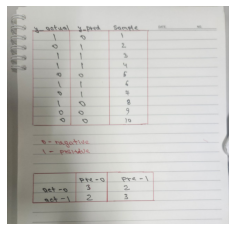

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Rasm fayli nomi (shu fayl sizning papkangizda bo‘lishi kerak)
img = mpimg.imread("photo_202555.jpg")

# Rasmni ko‘rsatish
plt.imshow(img)
plt.axis('off')  # O‘qlarni yashirish
plt.show()


In [42]:
cm

array([[3, 2],
       [2, 3]], dtype=int64)